In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.fft import *
from scipy.io import wavfile


# Building a function to find the frequency of slices of the waveform

def freq(data, sample_rate, start_time, end_time):
    if data.ndim > 1:
        data = data[:, 0]
    data = data[start_time:end_time]
    N = len(data)
    yf = rfft(data)
    xf = rfftfreq(N, 1 / sample_rate)

    idx = np.argmax(np.abs(yf))
    freq = xf[idx]
    return freq

In [3]:
sr, data = wavfile.read("The_Arecibo_Message.wav")

In [4]:
slices = np.linspace(0, len(data), num = 73 * 23 + 2)

freqs = []
for i in range(1679):
    freqs.append(freq(data = data, 
                      sample_rate=sr, 
                      start_time = int(slices[i]), 
                      end_time = int(slices[i+1])))

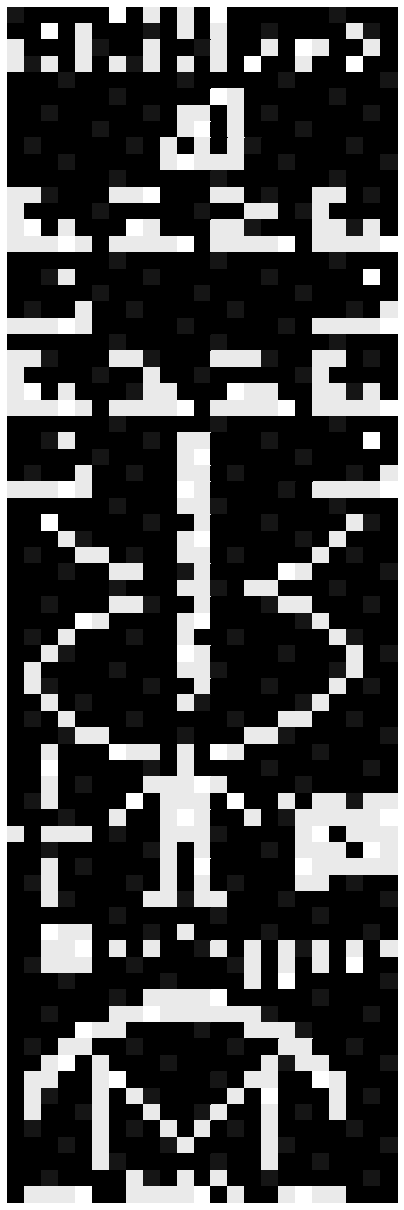

In [5]:
fig, ax = plt.subplots(figsize=(7,22))
sns.heatmap(np.array(freqs).reshape(73,23), cmap='gray', ax = ax, cbar=False)
ax.axes.yaxis.set_visible(False)
ax.axes.xaxis.set_visible(False)